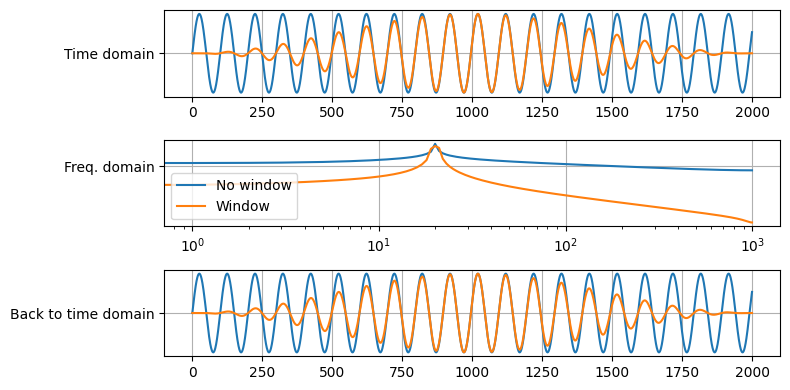

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

f = 20.1
Ttot = 1
fs = 2e3
t = np.arange(int(Ttot*fs)) / fs

x = np.sin(2 * np.pi * f * t)

# Going to frequency domain
n = len(x)   # FFT size
x_fft = np.fft.fft(x, n)
w = np.hanning(len(x))  # window
# w = np.ones(len(x))  # window
x_win = x * w
x_fft_win = np.fft.fft(x_win, n)
f_vec = np.fft.fftfreq(n) * fs
f_vec = f_vec[:int(n/2)]

# Back to time domain
x_bttd = np.fft.ifft(x_fft, n)
x_bttd = np.real_if_close(x_bttd)
x_bttd_win = np.fft.ifft(x_fft_win, n)
x_bttd_win = np.real_if_close(x_bttd_win)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(311)
ax.plot(x)
ax.plot(x_win)
ax.grid()
ax.set_yticks([0], labels=['Time domain'])
ax = fig.add_subplot(312)
ax.semilogx(f_vec, np.log10(np.abs(x_fft[:int(n/2)])), label='No window')
ax.plot(f_vec, np.log10(np.abs(x_fft_win[:int(n/2)])), label='Window')
ax.grid()
ax.set_yticks([0], labels=['Freq. domain'])
plt.legend()
ax = fig.add_subplot(313)
ax.plot(x_bttd)
ax.plot(x_bttd_win)
ax.grid()
ax.set_yticks([0], labels=['Back to time domain'])
plt.tight_layout()	
plt.show()

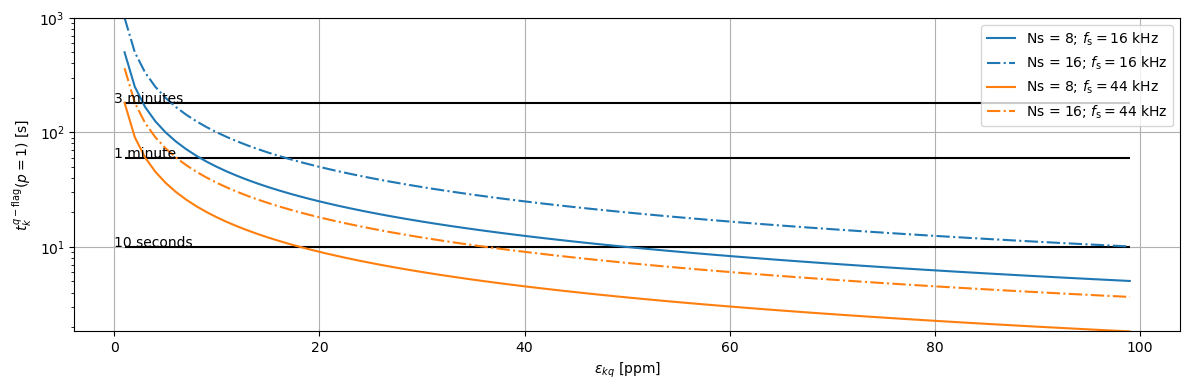

In [9]:
# Reference: Word journal, week24, FRI

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

eps_range = np.arange(1,100) * 1e-6    # PPM
# Ns = np.array([2**i for i in np.arange(8,11)])
Ns = np.array([2**i for i in np.arange(3,5)])
fs = [16e3, 44.1e3]
# fs = [16e3]
# sampleDelay = 3        # activation delay between the two nodes [samples]
sampleDelay = 0        # activation delay between the two nodes [samples]

res = np.zeros((len(eps_range), len(Ns), len(fs)))

for ii in range(len(eps_range)):
    for jj in range(len(Ns)):
        for kk in range(len(fs)):
            fsq = fs[kk] * (1 + eps_range[ii])          # neighbour node sampling frequency [Hz]
            actDelay = (sampleDelay % Ns[jj]) / fsq      # activation delay between the two nodes [s]
            # rescurr = Ns[jj] / (fs[kk] * eps_range[ii])   # <-- without considering activation delays
            rescurr = (Ns[jj] * (actDelay * fsq + Ns[jj])) / (fs[kk] * np.abs(actDelay * fsq - Ns[jj] * eps_range[ii]))
            res[ii,jj,kk] = rescurr

# Plot
styles = ['-', '-.', '--']
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax.hlines(y=[10, 60, 60*3, 60*60, 60*60*3], xmin=np.amin(eps_range * 1e6), xmax=np.amax(eps_range * 1e6), color='k')

for ii in range(len(fs)):
    for jj in range(len(Ns)):
        ax.semilogy(eps_range * 1e6, res[:, jj, ii], f'C{ii}{styles[jj]}', label=f'Ns = {Ns[jj]}; $f_\\mathrm{{s}} = {int(fs[ii]/1e3)}$ kHz')

if np.amax(res) > 10:
    ax.text(0, 10, '10 seconds')
    if np.amax(res) > 60:
        ax.text(0, 60, '1 minute')
        if np.amax(res) > 60*3:
            ax.text(0, 60*3, '3 minutes')
            if np.amax(res) > 60*60:
                ax.text(0, 60*60, '1 hour')
                if np.amax(res) > 60*60*3:
                    ax.text(0, 60*60*3, '3 hours')
ax.grid()
ax.set_ylabel('$t_k^{{q-\\mathrm{{flag}}}}(p=1)$ [s]')
ax.set_xlabel('$\\varepsilon_{{kq}}$ [ppm]')
ax.set_ylim([np.amin(res), np.amax(res)])
plt.legend()
plt.tight_layout()
plt.show()

# fig.savefig('figs/firstflags_sro.png')
# fig.savefig('figs/firstflags_sro.pdf')


In [5]:
np.amax(res)

inf